In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#CSV dosyasını okuma
df = pd.read_csv("movie_metadata.csv")

#ilk 5 satırı görüntüleme
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [2]:
# Veri setinin genel bilgileri
df.info()

#Eksik Veri kontrolü
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [3]:
# Sayısal Verilerin İstatiksel özeti
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [4]:
#Sütunlar ile çalışmak için sütun isimlerimizi görelim
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

### 1.Eksik Verileri Temizleme ve Doldurma

In [5]:
#Sayısal sütunları medyan ile doldurma(ortalama ile de doldurulabilir)
num_cols =["budget","gross","aspect_ratio","num_critic_for_reviews","duration"]
for col in num_cols:
    df[col].fillna(df[col].median(),inplace=True)

#Kategorik Sütunları en sık görülen değer (mod) ile doldurma
cat_cols =["color","director_name","content_rating","country","language"]
for col in cat_cols:
    df[col].fillna(df[col].mode()[0],inplace=True)

#Eksik verileri kontrol etme
df.isnull().sum()

C:\Users\SuleymanSardogan\AppData\Local\Temp\ipykernel_10184\3126047668.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
C:\Users\SuleymanSardogan\AppData\Local\Temp\ipykernel_10184\3126047668.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

color                          0
director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                       0
country                        0
content_rating                 0
budget                         0
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

### 2.Temel İstatiksel Analizler

In [6]:
#IMDB puanlarının dağılımını kontrol etme
print(df["imdb_score"].describe())

#Bütçe ve hasılat için temel istatistikler
print(df[["budget","gross"]].describe())

#Yıl bazında kaç film çekildiğini görmek için
print(df["title_year"].value_counts().sort_index())

count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64
             budget         gross
count  5.043000e+03  5.043000e+03
mean   3.782554e+07  4.444529e+07
std    1.958882e+08  6.277281e+07
min    2.180000e+02  1.620000e+02
25%    7.000000e+06  8.460992e+06
50%    2.000000e+07  2.551750e+07
75%    4.000000e+07  5.135707e+07
max    1.221550e+10  7.605058e+08
title_year
1916.0      1
1920.0      1
1925.0      1
1927.0      1
1929.0      2
         ... 
2012.0    221
2013.0    237
2014.0    252
2015.0    226
2016.0    106
Name: count, Length: 91, dtype: int64


### 3.Görselleştirmeler

#### 3.1 IMDB Puanları

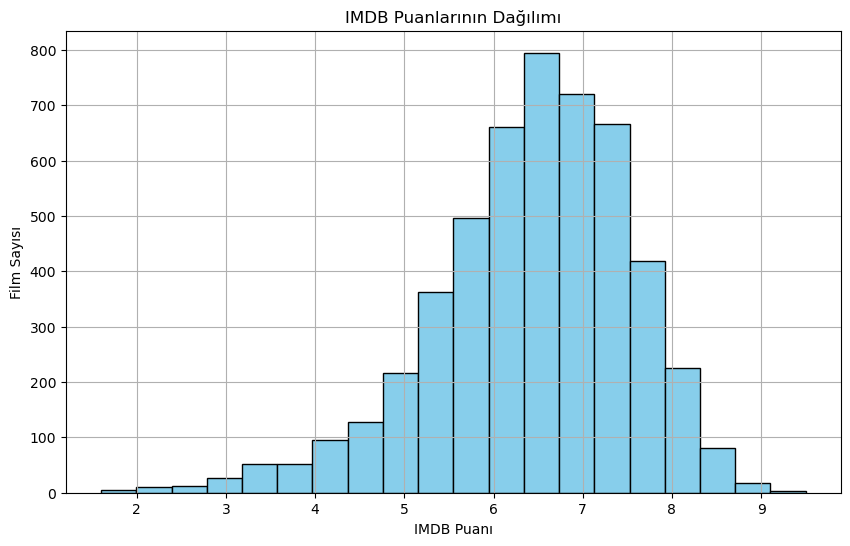

In [7]:
plt.figure(figsize=(10,6))
#Histogram grafik
plt.hist(df["imdb_score"], bins =20, color ="skyblue",  edgecolor="black")
plt.xlabel("IMDB Puanı")
plt.ylabel("Film Sayısı")
plt.title("IMDB Puanlarının Dağılımı")
# Arkaya ızgara göstererek veri karşılaştırmasını kolaylaştırır
plt.grid(True)
plt.show()

#### 3.2 Yıllara Göre Çekilen Film Sayısı

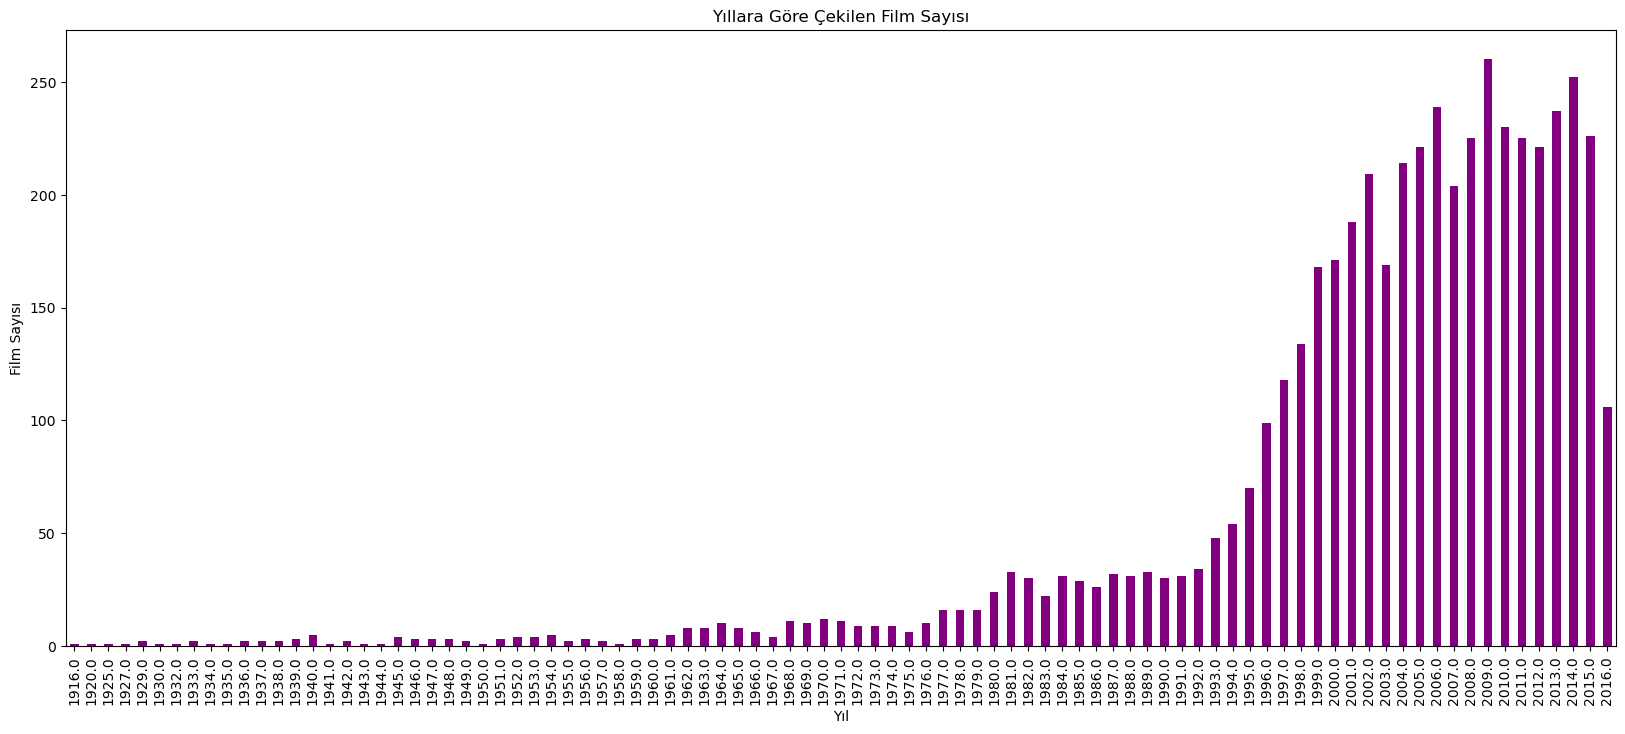

In [8]:
plt.figure(figsize=(20,8))
df["title_year"].value_counts().sort_index().plot(kind ="bar",color="purple")
plt.xlabel("Yıl")
plt.ylabel("Film Sayısı")
plt.title("Yıllara Göre Çekilen Film Sayısı")
plt.show()

#### 3.3 Bütçe ve Hasılat İlişkisi 

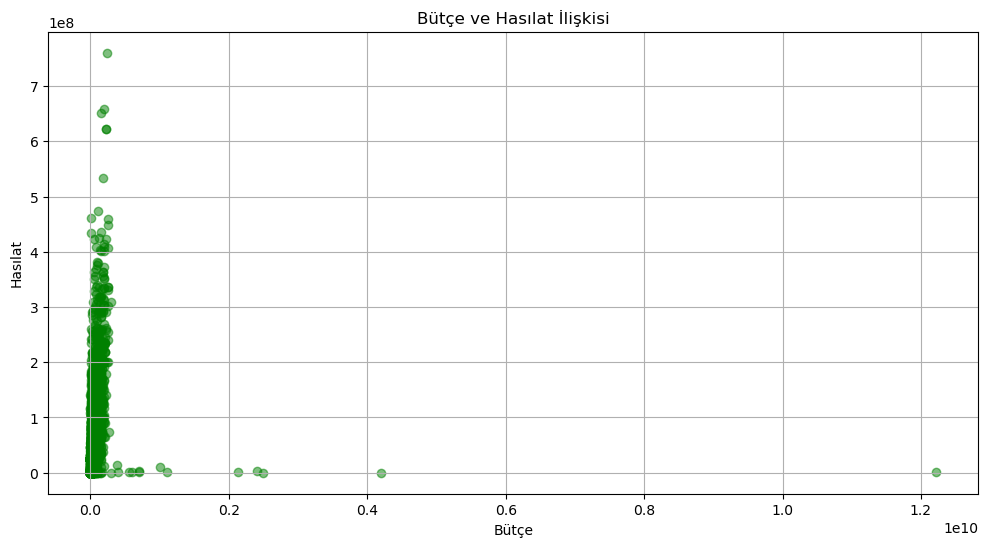

In [9]:
plt.figure(figsize=(12,6))
plt.scatter(df["budget"],df["gross"],color="green",alpha=0.5)
plt.title("Bütçe ve Hasılat İlişkisi")
plt.xlabel("Bütçe")
plt.ylabel("Hasılat")
plt.grid(True)
plt.show()

#### 3.4 En Çok Film Çekilen Ülkeler

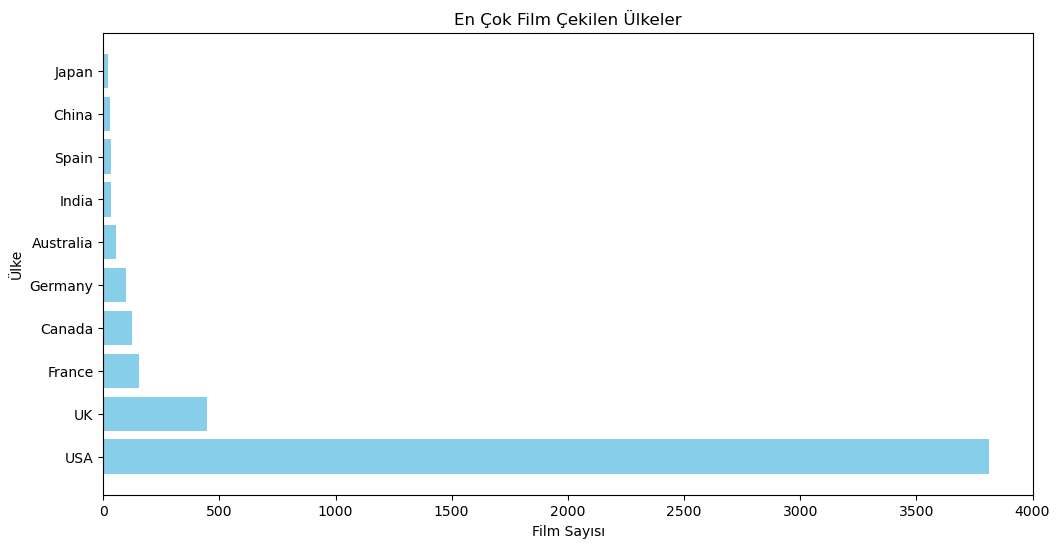

In [10]:
country_counts = df["country"].value_counts().head(10)#İlk 10 ülkeyi al
plt.figure(figsize=(12,6))
plt.barh(country_counts.index,country_counts.values,color ="skyblue")#Yatay bar grafiği
plt.xlabel("Film Sayısı")
plt.ylabel("Ülke")
plt.title("En Çok Film Çekilen Ülkeler")
plt.show()

#### 3.5 En Çok Fİlm Çeken 10 Yönetmen(Bar Chart)

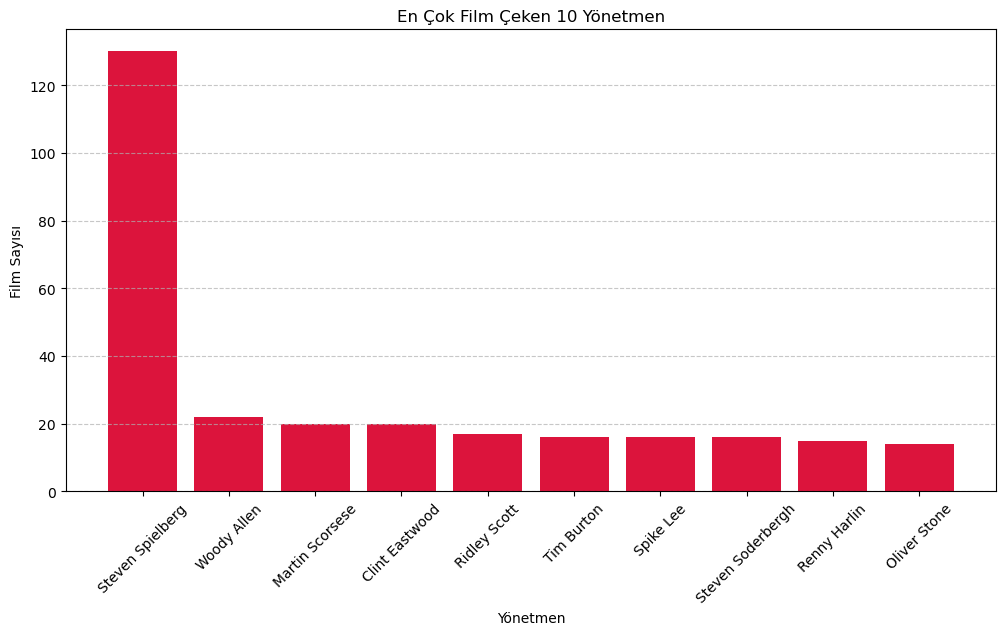

In [11]:
top_director = df["director_name"].value_counts().head(10) #İlk 10 yönetmen
plt.figure(figsize=(12,6))
plt.bar(top_director.index,top_director.values,color="crimson")
plt.xlabel("Yönetmen")
plt.ylabel("Film Sayısı")
plt.title("En Çok Film Çeken 10 Yönetmen")
plt.xticks(rotation=45)
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.show()

#### 3.6 Filmlerin Yıllara Göre IMDB Puan Ortalaması(Line Plot)

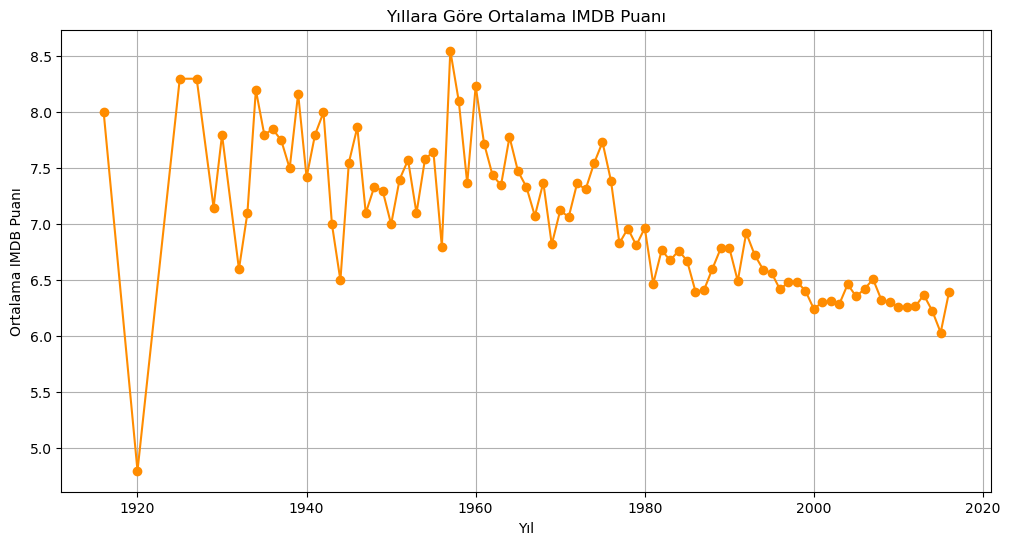

In [12]:
yearly_imdb = df.groupby("title_year")["imdb_score"].mean()
plt.figure(figsize=(12,6))
plt.plot(yearly_imdb.index,yearly_imdb.values,marker="o",color="darkorange",linestyle="-")
plt.xlabel("Yıl")
plt.ylabel("Ortalama IMDB Puanı")
plt.title("Yıllara Göre Ortalama IMDB Puanı")
plt.grid(True)
plt.show()

#### 3.7 Focabook Beğenileri ve IMDB Puanı İlişkisi(Scatter)

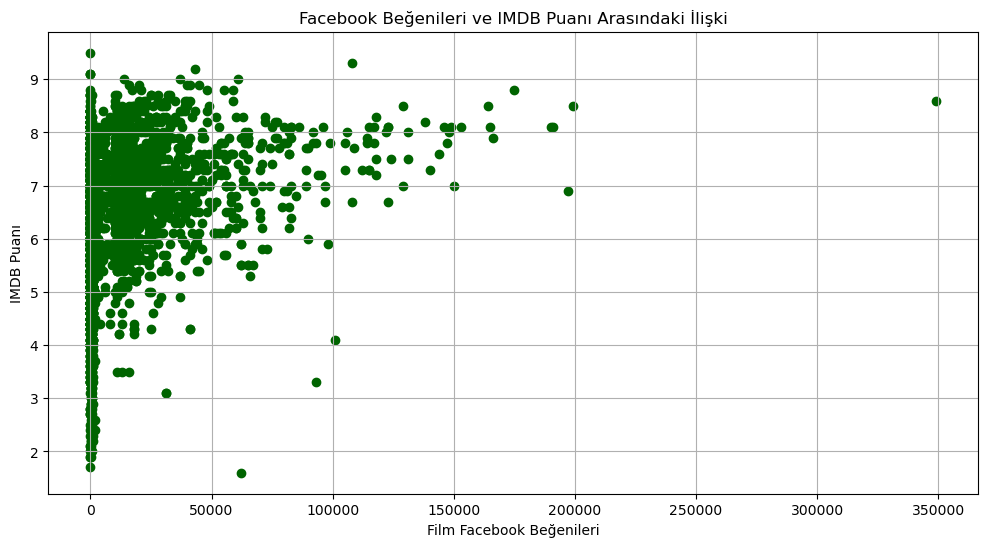

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(df["movie_facebook_likes"],df["imdb_score"],color="darkgreen")
plt.xlabel("Film Facebook Beğenileri")
plt.ylabel("IMDB Puanı")
plt.title("Facebook Beğenileri ve IMDB Puanı Arasındaki İlişki")
plt.grid(True)
plt.show()

### 4 Türlere Göre IMDB Puanlarının Karşılaştırılması

In [14]:
genre_scores = df.explode("imdb_score").groupby("genres")["imdb_score"].mean()
print(genre_scores.head(10)) #En yükse IMDB puanına sahip türler

genres
Action                                                             5.972727
Action|Adventure                                                   6.700000
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy             6.200000
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller    6.000000
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi              7.950000
Action|Adventure|Animation|Comedy|Family                           6.500000
Action|Adventure|Animation|Comedy|Family|Fantasy                   7.325000
Action|Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi            5.700000
Action|Adventure|Animation|Comedy|Family|Sci-Fi                    5.966667
Action|Adventure|Animation|Comedy|Fantasy                          7.200000
Name: imdb_score, dtype: float64


### 5.En Popüler Yönetmenler(IMDB Puanına Göre)

In [15]:
 top_directors =df.groupby("director_name")["imdb_score"].mean().sort_values(ascending=False).head(10)
print(top_directors)

director_name
John Blanchard      9.5
Mitchell Altieri    8.7
Cary Bell           8.7
Sadyk Sher-Niyaz    8.7
Mike Mayhall        8.6
Charles Chaplin     8.6
Damien Chazelle     8.5
Majid Majidi        8.5
Raja Menon          8.5
Ron Fricke          8.5
Name: imdb_score, dtype: float64


### 6. Oyuncuların Popülerliği

In [16]:
top_actors= df[["actor_1_name","actor_1_facebook_likes"]].dropna().sort_values(by='actor_1_facebook_likes', ascending=False).head(10)
print(top_actors)

         actor_1_name  actor_1_facebook_likes
1902    Darcy Donavan                640000.0
4704     Matthew Ziff                260000.0
4592     Matthew Ziff                260000.0
4409     Matthew Ziff                260000.0
4045     Krista Allen                164000.0
1223     Krista Allen                164000.0
2269  Andrew Fiscella                137000.0
2939  Andrew Fiscella                137000.0
74      Jimmy Bennett                 87000.0
555     Jimmy Bennett                 87000.0


### 7. En yüksek ve En düşük IMDB Puanlı Filmler

In [17]:
top_movies = df[["movie_title","imdb_score"]].sort_values(by="imdb_score",ascending=False).head(10)
low_movies = df[["movie_title","imdb_score"]].sort_values(by="imdb_score",ascending=True).head(10)

#En iyi filmler
print("En yüksek IMDB Puanlı Filmler: ")
print(top_movies)
print("En düşük IMDB Puanlı Filmler: ")
print(low_movies)


En yüksek IMDB Puanlı Filmler: 
                        movie_title  imdb_score
2765  Towering Inferno                      9.5
1937      The Shawshank Redemption          9.3
3466                 The Godfather          9.2
3207           Dekalog                      9.1
2824           Dekalog                      9.1
4409          Kickboxer: Vengeance          9.1
3481             Fargo                      9.0
66                 The Dark Knight          9.0
2837        The Godfather: Part II          9.0
1874              Schindler's List          8.9
En düşük IMDB Puanlı Filmler: 
                          movie_title  imdb_score
2834  Justin Bieber: Never Say Never          1.6
1136                      Foodfight!          1.7
2295    Superbabies: Baby Geniuses 2          1.9
2268                  Disaster Movie          1.9
4605             The Helix... Loaded          1.9
1729                 United Passions          2.0
3505               Who's Your Caddy?          2.0
3340     

### 8. Film Süresi ve IMDB Arasındaki İlişkisi

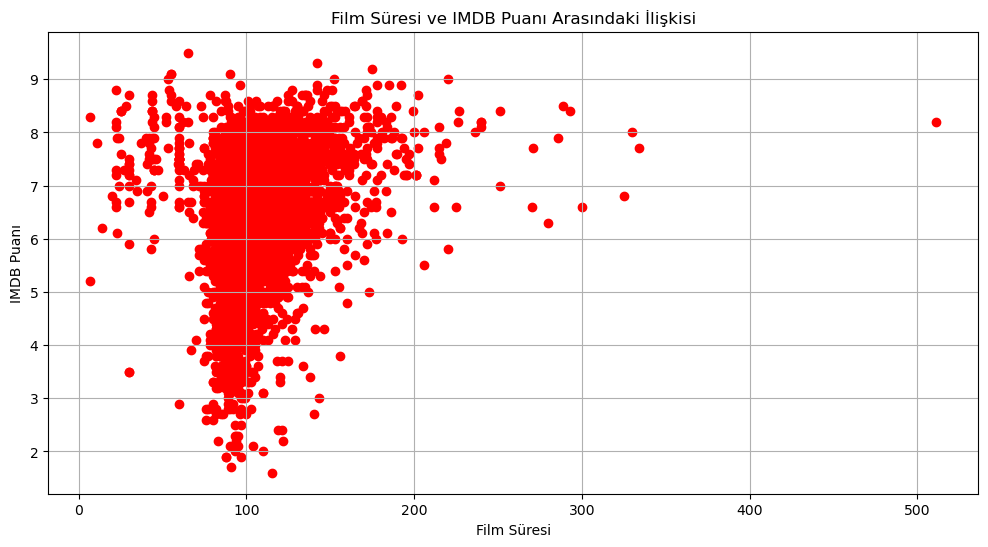

In [18]:
plt.figure(figsize=(12,6))
plt.scatter(df["duration"],df["imdb_score"],color="red")
plt.xlabel("Film Süresi")
plt.ylabel("IMDB Puanı")
plt.title("Film Süresi ve IMDB Puanı Arasındaki İlişkisi")
plt.grid(True)
plt.show()

### Ülke Başına Ortalama IMDB Puanı

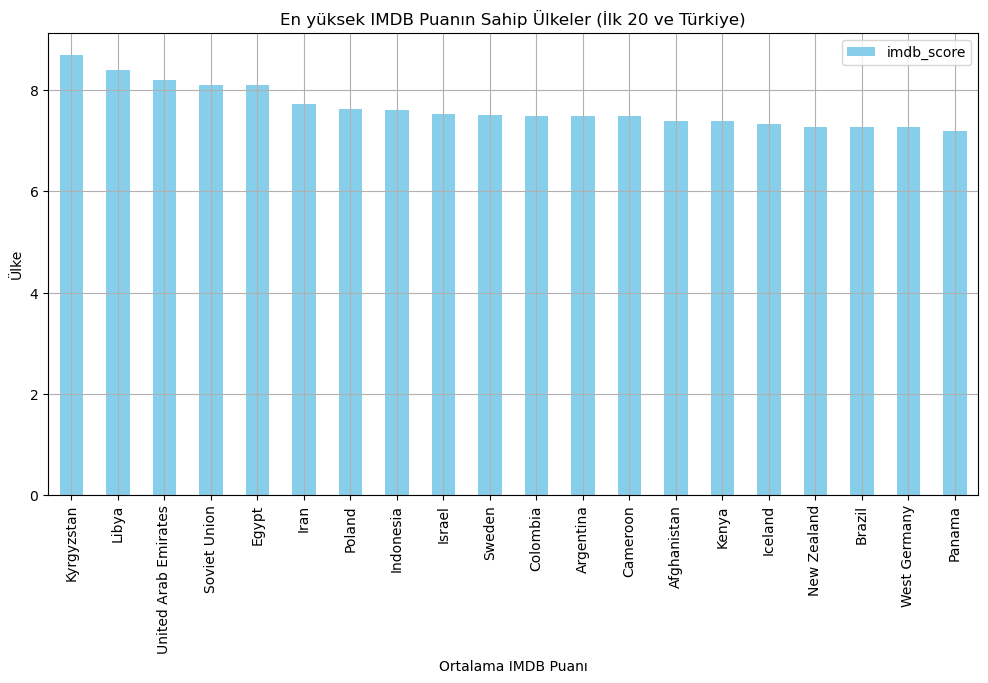

In [29]:
#Ülkere göre IMDB Puan Ortalamalarını Al
country_avg_imdb = df.groupby("country")["imdb_score"].mean().sort_values(ascending=False)
#Türkiye'nin IMDB Puanı

plt.figure(figsize=(12,6))
#İl 20 ülkeyi çiz
country_avg_imdb.head(20).plot(kind="bar",color="skyblue")


plt.xlabel("Ortalama IMDB Puanı")
plt.ylabel("Ülke")
plt.title("En yüksek IMDB Puanın Sahip Ülkeler (İlk 20 ve Türkiye)")

#Verilerin ayır edilebilmesi için legend
plt.legend()
#Izgara
plt.grid(True)
plt.show()


### İndex Tabanlı Veri Seçimi

In [31]:
#İlk 10 satır 10 Sütun
df.iloc[:10 ,:10]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller
4,Color,Doug Walker,110.0,103.0,131.0,NaN,Rob Walker,131.0,25517500.0,Documentary
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery


### Etiket Tabanlı Seçim 

In [33]:
# 'movie_title' ve 'imdb_score' sütunlarından ilk 10 satır
df.loc[:9,["movie_title","imdb_score"]]

,movie_title,imdb_score
0,Avatar,7.9
1,Pirates of the Caribbean: At World's End,7.1
2,Spectre,6.8
3,The Dark Knight Rises,8.5
4,Star Wars: Episode VII - The Force Awakens ...,7.1
5,John Carter,6.6
6,Spider-Man 3,6.2
7,Tangled,7.8
8,Avengers: Age of Ultron,7.5
9,Harry Potter and the Half-Blood Prince,7.5


### aplly() Fonksiyonun Uygulaması

In [40]:
df["imdb_score"] = df["imdb_score"].apply(lambda x:x*10)
imdbb = df.groupby("imdb_score")["movie_title"]

# IMDb puanlarına göre film başlıklarını listele
imdbb_list = imdbb.apply(list)

# Listeyi yazdır
print(imdbb_list)

imdb_score
16000000.0                    [Justin Bieber: Never Say Never ]
17000000.0                                        [Foodfight! ]
19000000.0    [Disaster Movie , Superbabies: Baby Geniuses 2...
20000000.0               [United Passions , Who's Your Caddy? ]
21000000.0        [From Justin to Kelly , Glitter , Crossover ]
                                    ...                        
90000000.0    [The Dark Knight , The Godfather: Part II , Fa...
91000000.0    [Dekalog             , Dekalog             , K...
92000000.0                                     [The Godfather ]
93000000.0                          [The Shawshank Redemption ]
95000000.0                      [Towering Inferno             ]
Name: movie_title, Length: 78, dtype: object


### Türlere Göre Ortalam Bütçe

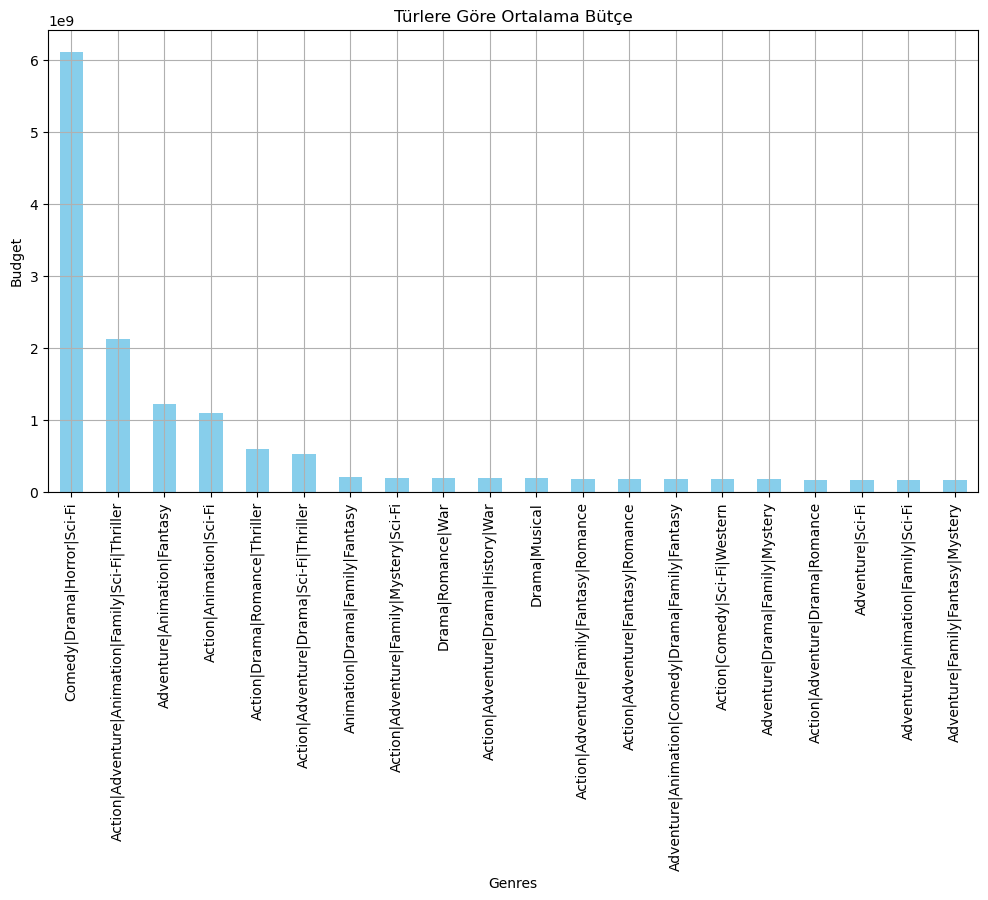

In [42]:
genre_avg_budget = df.explode("genres").groupby("genres")["budget"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
genre_avg_budget.head(20).plot(kind="bar",color="skyblue")
plt.xlabel("Genres")
plt.ylabel("Budget")
plt.title("Türlere Göre Ortalama Bütçe")
plt.grid(True)
plt.show()

### Veri Setine Yeni Sütun Ekleme

In [47]:
df['duration_to_score'] = df['duration'] / df['imdb_score']


# Yeni sütunu görüntüleme
print(df[['movie_title', 'duration', 'imdb_score', 'duration_to_score']].head())

                                         movie_title  duration  imdb_score  \
0                                            Avatar      178.0  79000000.0   
1          Pirates of the Caribbean: At World's End      169.0  71000000.0   
2                                           Spectre      148.0  68000000.0   
3                             The Dark Knight Rises      164.0  85000000.0   
4  Star Wars: Episode VII - The Force Awakens    ...     103.0  71000000.0   

   duration_to_score  
0           0.000002  
1           0.000002  
2           0.000002  
3           0.000002  
4           0.000001  


### Veri kümesini Filtrelemek

In [53]:
high_score_movies = df[df["imdb_score"]>7.0]
print(high_score_movies)

      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4     Color        Doug Walker                   110.0     103.0   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color   Steven Spielberg                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0    

In [56]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,duration_to_score
count,5043.000000,5043.000000,4939.000000,5020.000000,5036.000000,5.043000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,5.043000e+03,4935.000000,5030.000000,5.043000e+03,5043.000000,5043.000000,5.043000e+03
mean,139.894904,107.188578,686.509212,645.009761,6560.047061,4.444529e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.782554e+07,2002.470517,1651.754473,6.442138e+07,2.228858,7525.964505,1.711214e-06
std,121.034214,25.160972,2813.328607,1665.041728,15020.759120,6.277281e+07,1.384853e+05,18163.799124,2.013576,377.982886,1.958882e+08,12.474599,4042.438863,1.125116e+07,1.339542,19320.445110,4.739732e-07
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000e+07,1.180000,0.000000,8.433735e-08
25%,50.000000,93.000000,7.000000,133.000000,614.000000,8.460992e+06,8.593500e+03,1411.000000,0.000000,65.000000,7.000000e+06,1999.000000,281.000000,5.800000e+07,1.850000,0.000000,1.455696e-06
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000e+07,2.350000,166.000000,1.657895e-06
75%,194.000000,118.000000,194.500000,636.000000,11000.000000,5.135707e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.000000e+07,2011.000000,918.000000,7.200000e+07,2.350000,3000.000000,1.890909e-06
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000e+07,16.000000,349000.000000,7.187500e-06


In [57]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,duration_to_score
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,79000000.0,1.78,33000,2.253165e-06
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,71000000.0,2.35,0,2.380282e-06
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,68000000.0,2.35,85000,2.176471e-06
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,85000000.0,2.35,164000,1.929412e-06
4,Color,Doug Walker,110.0,103.0,131.0,NaN,Rob Walker,131.0,25517500.0,Documentary,...,English,USA,R,20000000.0,NaN,12.0,71000000.0,2.35,0,1.450704e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,25517500.0,Comedy|Drama,...,English,Canada,R,20000000.0,2013.0,470.0,77000000.0,2.35,84,1.129870e-06
5039,Color,Steven Spielberg,43.0,43.0,NaN,319.0,Valorie Curry,841.0,25517500.0,Crime|Drama|Mystery|Thriller,...,English,USA,TV-14,20000000.0,NaN,593.0,75000000.0,16.00,32000,5.733333e-07
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,25517500.0,Drama|Horror|Thriller,...,English,USA,R,1400.0,2013.0,0.0,63000000.0,2.35,16,1.206349e-06
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,English,USA,PG-13,20000000.0,2012.0,719.0,63000000.0,2.35,660,1.587302e-06


In [59]:
country_counts = df["country"].value_counts()
print(country_counts)

country
USA                     3812
UK                       448
France                   154
Canada                   126
Germany                   97
                        ... 
Dominican Republic         1
Cameroon                   1
United Arab Emirates       1
Kenya                      1
Philippines                1
Name: count, Length: 65, dtype: int64
